## Lab 6: Gamma Ray Spectroscopy

Imports

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import math as m
from scipy.optimize import curve_fit
import scienceplots
plt.style.use(['science','no-latex'])

In [3]:
co = pd.read_csv('Co60dat.csv')
co_chan = co.loc[:,'Channel number']
co_imp = co.loc[:,'Impulses']

cs = pd.read_csv('Cs137dat.csv')
cs_chan = cs.loc[:,'Channel number']
cs_imp = cs.loc[:,'Impulses']

ra = pd.read_csv('Radat.csv')
ra_chan = ra.loc[:,'Channel number']
ra_imp = ra.loc[:,'Impulses']

th = pd.read_csv('Thdat.csv')
th_chan = th.loc[:,'Channel number']
th_imp = th.loc[:,'Impulses']

bg = pd.read_csv('Bg.csv')
bg_chan = bg.loc[:,'Channel number']
bg_imp = bg.loc[:,'Impulses']

Analysis

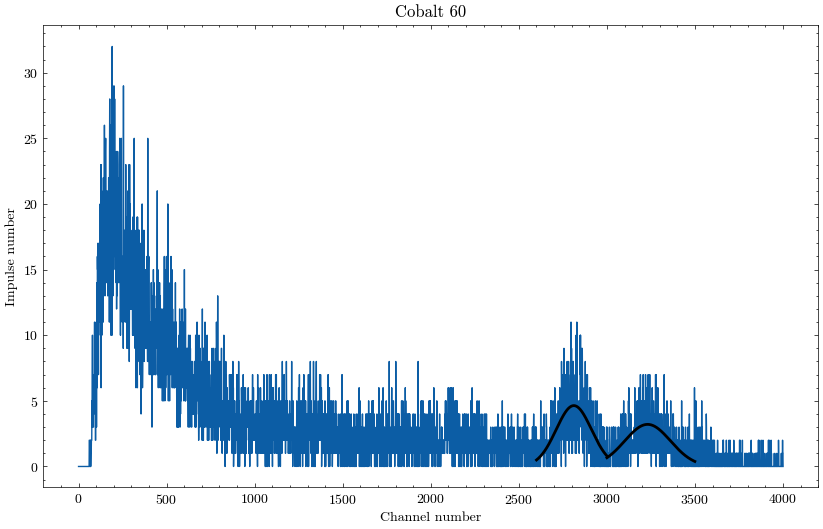

In [4]:
plt.figure(figsize=(10,6))
plt.plot(co_chan, co_imp)
plt.title("Cobalt 60")
plt.xlabel("Channel number")
plt.ylabel("Impulse number")

def gauss(x, a, x0, sigma):
    y = a*np.exp(-(x-x0)**2/(2*sigma**2)) 
    return y

xf = co_chan[2600:3000]
yf = co_imp[2600:3000]
n = len(xf)   
mean = np.sum(xf * yf) / np.sum(yf)
sigma = np.sqrt(np.sum(yf * (xf - mean)**2) / np.sum(yf))
a_guess = np.max(yf)

param, cov = curve_fit(gauss, xf, yf, p0=[a_guess,mean,sigma])
yfit = gauss(xf, *param)
plt.plot(xf, yfit, c='black', linewidth=2)

xf = co_chan[3000:3500]
yf = co_imp[3000:3500]
n = len(xf)   
mean = np.sum(xf * yf) / np.sum(yf)
sigma = np.sqrt(np.sum(yf * (xf - mean)**2) / np.sum(yf))
a_guess = np.max(yf)

param, cov = curve_fit(gauss, xf, yf, p0=[a_guess,mean,sigma])
yfit = gauss(xf, *param)
plt.plot(xf, yfit, c='black', linewidth=2)

plt.savefig("co.pdf")

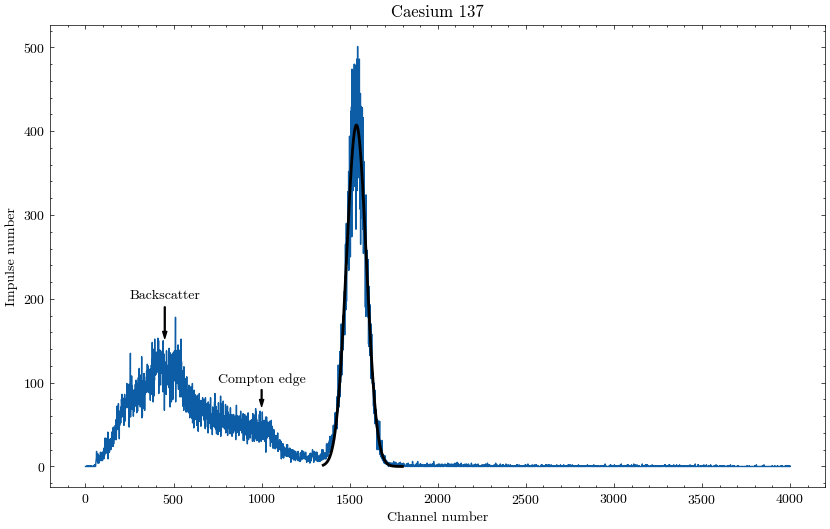

In [5]:
plt.figure(figsize=(10,6))
plt.plot(cs_chan, cs_imp)
plt.title("Caesium 137")
plt.xlabel("Channel number")
plt.ylabel("Impulse number")

def gauss(x, a, x0, sigma):
    y = a*np.exp(-(x-x0)**2/(2*sigma**2)) 
    return y

xf = cs_chan[1350:1800]
yf = cs_imp[1350:1800]
n = len(xf)   
mean = np.sum(xf * yf) / np.sum(yf)
sigma = np.sqrt(np.sum(yf * (xf - mean)**2) / np.sum(yf))
a_guess = np.max(yf)

param, cov = curve_fit(gauss, xf, yf, p0=[a_guess,mean,sigma])
yfit = gauss(xf, *param)

plt.plot(xf, yfit, c='black', linewidth=2)
arrow = dict(facecolor='black', shrink=0.06, width=0.6, headwidth=3, headlength=5)
plt.annotate("Backscatter", xy=(450, 150), xytext=(450, 200), arrowprops=arrow, horizontalalignment='center')
plt.annotate("Compton edge", xy=(1000, 70), xytext=(1000, 100), arrowprops=arrow, horizontalalignment='center')

plt.savefig("ca.pdf")

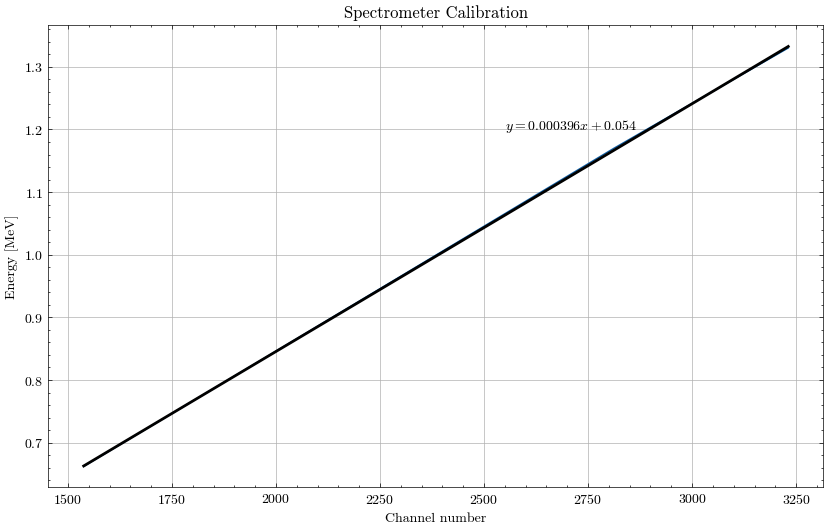

In [6]:
plt.figure(figsize=(10,6))
chans = np.asarray([1538.0, 2812.0, 3231.0])
energy = np.asarray([0.662, 1.17, 1.33])
plt.plot(chans, energy)

def f(x, m , c):
    return m*x + c
theparam, cov = curve_fit(f, chans, energy)
yfit = f(chans, *theparam)
slope = theparam[0] 

plt.xlabel("Channel number")
plt.ylabel("Energy [MeV]")
plt.title("Spectrometer Calibration")
plt.plot(chans, yfit, c='black', linewidth=2)
plt.grid()
plt.annotate(fr"$y = {round(theparam[0],6)}x + {round(theparam[1],3)}$", (2550, 1.2))

plt.savefig("cal.pdf")

FWHM =  93.05659661306501
{156: 116.17110632808955, 511: 256.58833840465144, 745: 349.14504912554014, 1350: 588.4476559039061, 2198: 923.8668468924257, 2620: 1090.7853593890713, 3490: 1434.9064633513497}


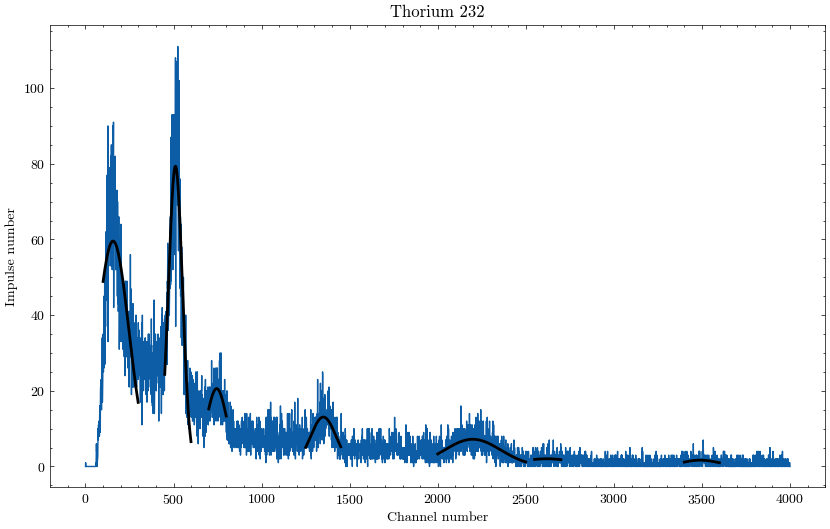

In [43]:
plt.figure(figsize=(10,6))
plt.plot(th_chan, th_imp)
plt.title("Thorium 232")
plt.xlabel("Channel number")
plt.ylabel("Impulse number")

def gauss(x, a, x0, sigma):
    y = a*np.exp(-(x-x0)**2/(2*sigma**2)) 
    return y

peaks = [[100, 300],  [450, 600], [700, 800], [1250, 1450], [2000, 2500], [2550, 2700], [3400, 3600]] # guessing peaks
chans = [] # list to contain channel numbers of peaks
for i, p in enumerate(peaks):
    xf = th_chan[p[0]:p[1]]
    yf = th_imp[p[0]:p[1]]
    n = len(xf)   
    mean = np.sum(xf * yf) / np.sum(yf)
    sigma = np.sqrt(np.sum(yf * (xf - mean)**2) / np.sum(yf))
    a_guess = np.max(yf)

    param, cov = curve_fit(gauss, xf, yf, p0=[a_guess,mean,sigma])
    yfit = gauss(xf, *param)

    peaki = np.where(yfit == max(yfit))[0][0] 
    chans.append(xf.to_numpy()[0] + peaki) # add indices cut out when splicing

    plt.plot(xf, yfit, c='black', linewidth=2)

    if i == 1:
        fwhm = 2*np.sqrt(2*np.log(2))*param[2]
        print("FWHM = ", fwhm)

E = [(theparam[0]*chan + theparam[1])*1000 for chan in chans] # keV
edict = {}
E = sorted(E)
chans = sorted(chans)
for i, c in enumerate(chans):
    edict.update({c:E[i]})
print(edict)

plt.savefig("th.pdf")

{156: 116.17110632808955}


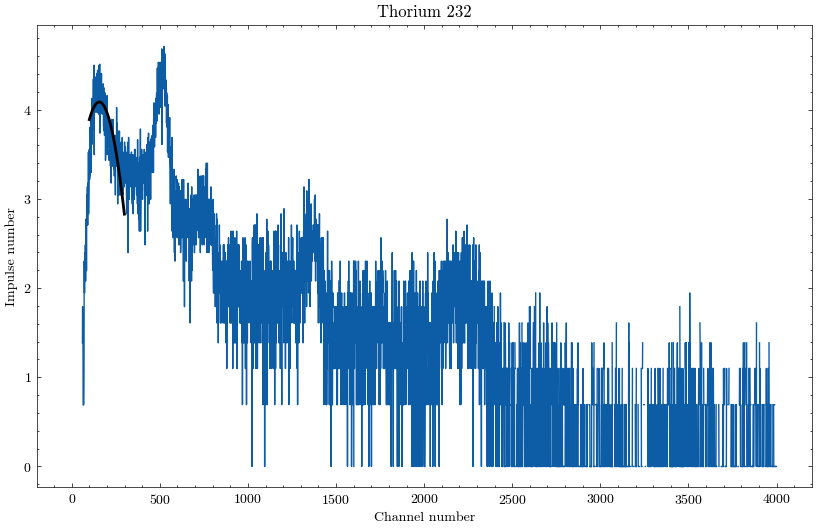

In [ ]:
log_imp = np.log(th_imp)
plt.figure(figsize=(10,6))
plt.plot(th_chan, log_imp)
plt.title("Thorium 232 (log))
plt.xlabel("Channel number")
plt.ylabel("Impulse number")

peaks = [[100,300]]
chans = [] # list to contain channel numbers of peaks
for p in peaks:
    xf = th_chan[p[0]:p[1]]
    yf = th_imp[p[0]:p[1]]
    n = len(xf)   
    mean = np.sum(xf * yf) / np.sum(yf)
    sigma = np.sqrt(np.sum(yf * (xf - mean)**2) / np.sum(yf))
    a_guess = np.max(yf)

    param, cov = curve_fit(gauss, xf, yf, p0=[a_guess,mean,sigma])
    yfit = gauss(xf, *param)

    peaki = np.where(yfit == max(yfit))[0][0] 
    chans.append(xf.to_numpy()[0] + peaki) # add indices cut out when splicing

    plt.plot(xf, np.log(yfit), c='black', linewidth=2)

E = [(theparam[0]*chan + theparam[1])*1000 for chan in chans] # keV
edict = {}
E = sorted(E)
chans = sorted(chans)
for i, c in enumerate(chans):
    edict.update({c:E[i]})
print(edict)


Channel:energy  {169: 121.31314581258337, 682: 324.2259347006855, 1060: 473.7406212498134, 2416: 1010.094893632399}
[5224.494320143731, 43714.69058573879, 51219.309963828666, 15927.37456932421]
[10.200243470349942, 85.34806622074824, 100.0, 31.096425509387384]


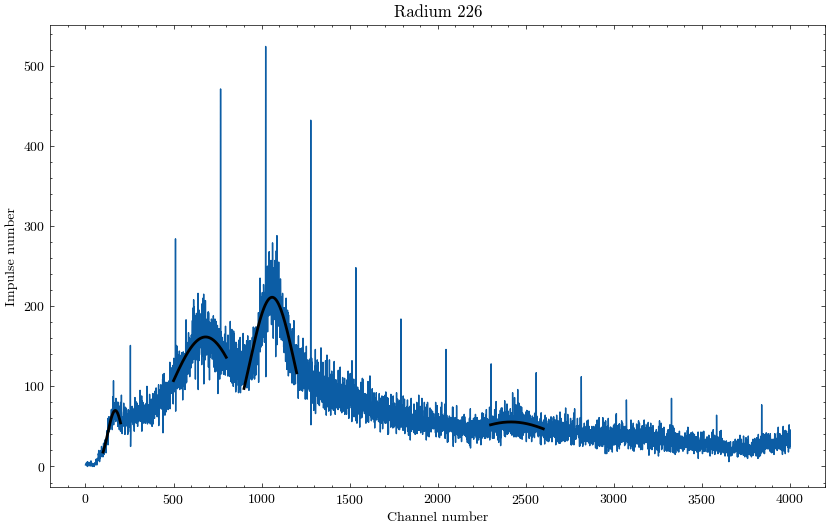

In [42]:
plt.figure(figsize=(10,6))
plt.plot(ra_chan, ra_imp)
plt.title("Radium 226")
plt.xlabel("Channel number")
plt.ylabel("Impulse number")

def gauss(x, a, x0, sigma):
    y = a*np.exp(-(x-x0)**2/(2*sigma**2)) 
    return y

peaks = [[100, 200], [500, 800], [900, 1200], [2300, 2600]]
chans = []
areas = []
for p in peaks:
    xf = ra_chan[p[0]:p[1]]
    yf = ra_imp[p[0]:p[1]]
    n = len(xf)   
    mean = np.sum(xf * yf) / np.sum(yf)
    sigma = np.sqrt(np.sum(yf * (xf - mean)**2) / np.sum(yf))
    a_guess = np.max(yf)

    param, cov = curve_fit(gauss, xf, yf, p0=[a_guess,mean,sigma])
    yfit = gauss(xf, *param)

    peaki = np.where(yfit == max(yfit))[0][0] 
    chans.append(xf.to_numpy()[0] + peaki) 

    area = np.trapz(yfit, xf)
    areas.append(area)

    plt.plot(xf, yfit, c='black', linewidth=2)

E = [(theparam[0]*chan + theparam[1])*1000 for chan in chans] # keV
edict = {}
E = sorted(E)
chans = sorted(chans)
for i, c in enumerate(chans):
    edict.update({c:E[i]})
print("Channel:energy ", edict)

print(areas)
ref = areas[2]/100 # take this peak as I = 100
intens = [a/ref for a in areas]
print(intens)

'''
real_e = [80, 186.1, 241.98, 295.21, 351.92, 609.31, 1001.03]
real_chans = [((e*1000)/1000000 - theparam[1])/theparam[0] for e in real_e]
for chan in real_chans:
    plt.axvline(chan + 10, c='black')
'''

plt.savefig("ra.pdf")

Text(0, 0.5, 'Impulse number')

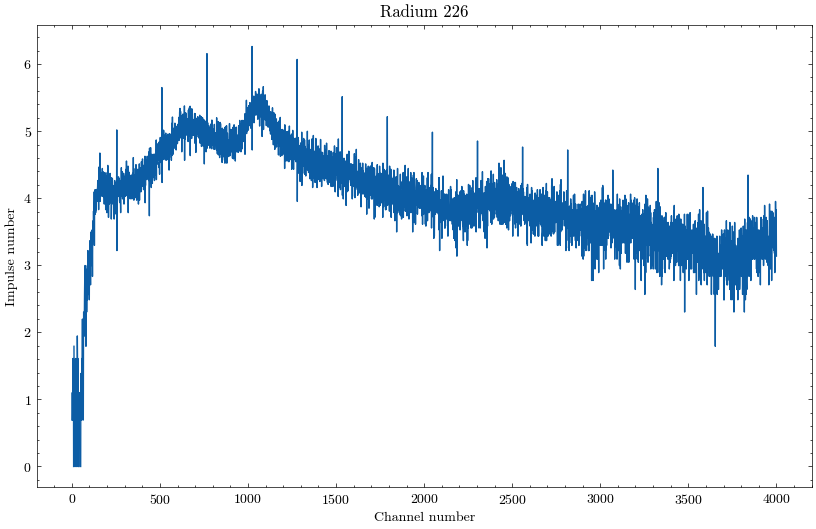

In [ ]:
plt.figure(figsize=(10,6))
plt.plot(ra_chan, np.log(ra_imp))
plt.title("Radium 226 (log)")
plt.xlabel("Channel number")
plt.ylabel("Impulse number")

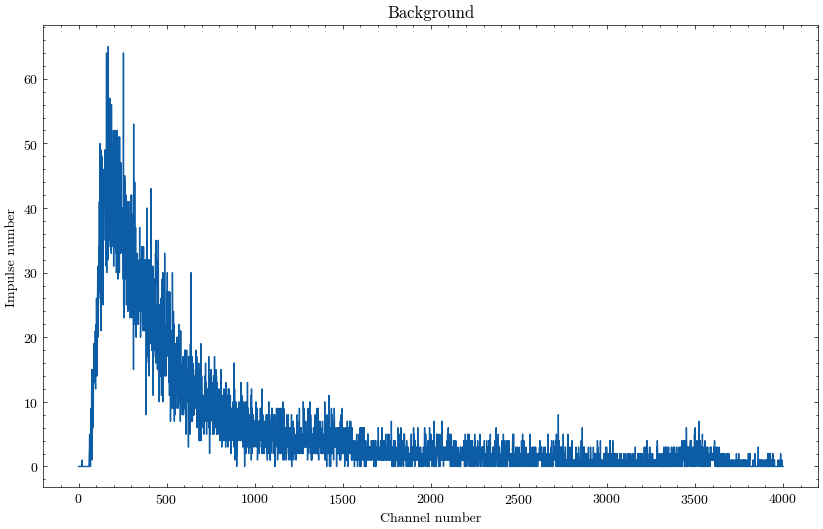

In [9]:
plt.figure(figsize=(10,6))
plt.plot(bg_chan, bg_imp)
plt.title("Background")
plt.xlabel("Channel number")
plt.ylabel("Impulse number")

plt.savefig("bg.pdf")

#### Plotting by energy

Text(0, 0.5, 'Impulse number')

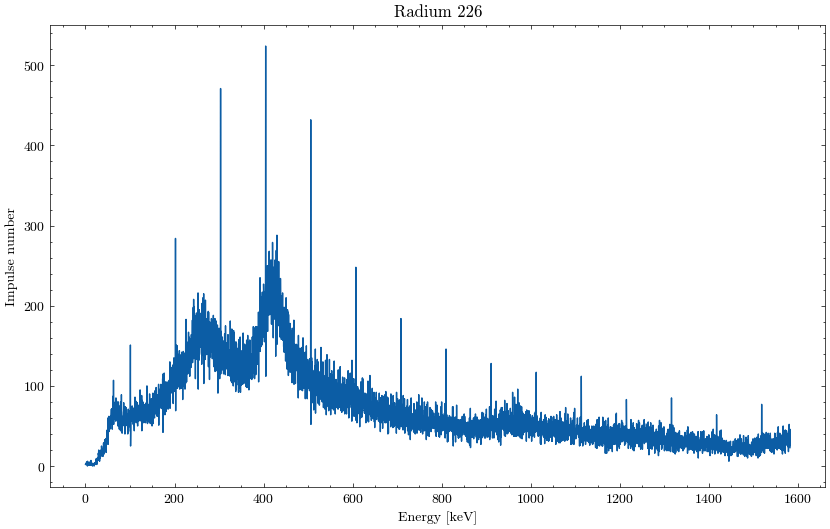

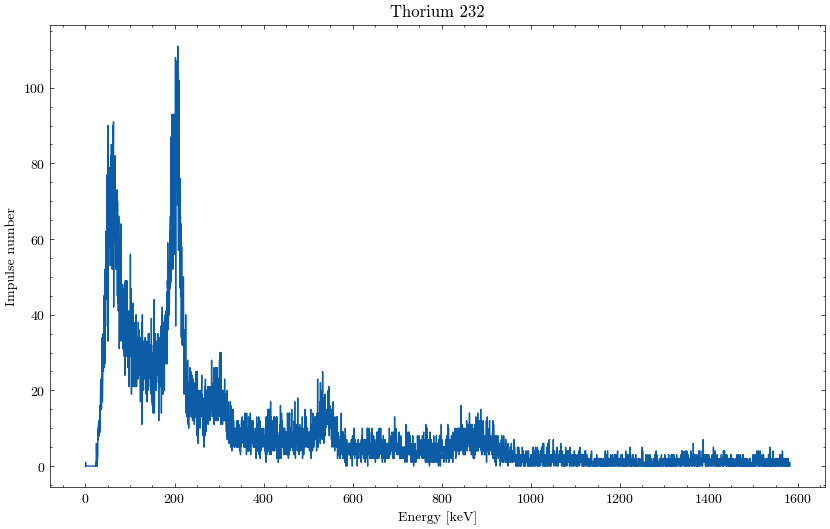

In [10]:
plt.figure(figsize=(10,6))
plt.plot(theparam[0]*ra_chan*1000, ra_imp)
plt.title("Radium 226")
plt.xlabel("Energy [keV]")
plt.ylabel("Impulse number")

plt.figure(figsize=(10,6))
plt.plot(theparam[0]*th_chan*1000, th_imp)
plt.title("Thorium 232")
plt.xlabel("Energy [keV]")
plt.ylabel("Impulse number")